In [1]:
# Importing Dependencies
# Data Engineering
import pandas as pd

# Data Cleaning
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("Resources/data/full_data_activities_facilities.csv")
data.head()

,FacilityID,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName
0,10000305,126,16669.0,Burro Creek Campground,-113.451688,34.535861,25,"CAMPING,WILDLIFE VIEWING,HIKING,PICNICKING,DAY..."
1,10001419,130,287.0,Cold Brook Campground,0.000000,0.000000,12,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,HIKIN..."
2,10001432,130,286.0,Cottonwood Springs Campground,0.000000,0.000000,18,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,HIKIN..."
3,10001451,128,2602.0,Steel Creek Campground,0.000000,0.000000,39,"CAMPING,FISHING,HIKING,PICNICKING,HORSEBACK RI..."
4,10003362,129,130.0,Chinamen's Campground,0.000000,0.000000,38,"BOATING,CAMPING,WATER ACTIVITIES"


In [3]:
len(data.index)

3266

In [4]:
Activities = data["ActivityName"].str.get_dummies(sep=',')
Activities

,ALL TERRAIN/OHV,DIFFICULT HIKING,HORSE,ACCESSIBLE SWIMMING,AMPHITHEATER,ANTIQUING,ARCHERY,AUTO TOURING,BACKPACKING,BADMINTON,...,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINDSURFING,WINERY TOURS,WINTER SPORTS,WOOD CUTTING
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Activities.columns()

TypeError: 'Index' object is not callable

In [7]:
Activity_Ranking= Activities.sum()
Activity_Ranking

 ALL TERRAIN/OHV          1
 DIFFICULT HIKING         1
 HORSE                    1
ACCESSIBLE SWIMMING      28
AMPHITHEATER             58
                       ... 
WILDLIFE VIEWING       1427
WINDSURFING               5
WINERY TOURS              2
WINTER SPORTS           186
WOOD CUTTING             10
Length: 125, dtype: int64

In [9]:
Activity_Ranking = pd.DataFrame(Activity_Ranking)
Activities_Ranking = Activity_Ranking.reset_index().sort_values([0], ascending=False)
Activities_Ranking.head(20).

,index,0
18,CAMPING,3014
38,FISHING,2327
43,HIKING,2285
17,BOATING,1483
120,WILDLIFE VIEWING,1427
13,BIKING,1229
51,HUNTING,763
108,SWIMMING SITE,729
27,DAY USE AREA,431
115,WATER SPORTS,403


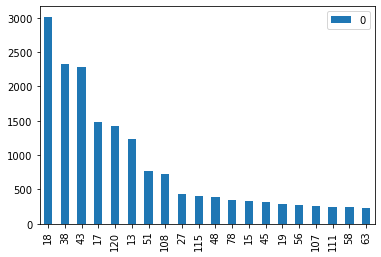

In [19]:
Activities_Ranking.head(20).plot(kind="bar")


In [11]:
full_activities_data = pd.concat([data,Activities], axis=1)
full_activities_data

,FacilityID,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,ALL TERRAIN/OHV,DIFFICULT HIKING,...,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINDSURFING,WINERY TOURS,WINTER SPORTS,WOOD CUTTING
0,10000305,126,16669.0,Burro Creek Campground,-113.451688,34.535861,25,"CAMPING,WILDLIFE VIEWING,HIKING,PICNICKING,DAY...",0,0,...,0,0,0,0,0,1,0,0,0,0
1,10001419,130,287.0,Cold Brook Campground,0.000000,0.000000,12,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,HIKIN...",0,0,...,0,0,0,0,0,1,0,0,0,0
2,10001432,130,286.0,Cottonwood Springs Campground,0.000000,0.000000,18,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,HIKIN...",0,0,...,0,0,0,0,0,1,0,0,0,0
3,10001451,128,2602.0,Steel Creek Campground,0.000000,0.000000,39,"CAMPING,FISHING,HIKING,PICNICKING,HORSEBACK RI...",0,0,...,0,0,0,0,0,0,0,0,0,0
4,10003362,129,130.0,Chinamen's Campground,0.000000,0.000000,38,"BOATING,CAMPING,WATER ACTIVITIES",0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,274314,131,1076.0,(LAKE ALPINE) SILVER VALLEY CAMPGROUND,-119.985000,38.480200,21,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",0,0,...,0,0,0,0,0,1,0,0,0,0
3262,274315,131,1101.0,JEMEZ FALLS CAMPGROUND,-106.606389,35.816389,51,"CAMPING,WILDLIFE VIEWING,BIKING,FIRE LOOKOUTS/...",0,0,...,0,0,0,0,0,1,0,0,0,0
3263,274410,131,1076.0,(LAKE ALPINE) SILVER TIP CAMPGROUND,-120.017000,38.481100,22,"BOATING,CAMPING,FISHING,WILDLIFE VIEWING,BIKIN...",0,0,...,0,0,0,0,0,1,0,0,0,0
3264,72417,131,1023.0,TEN MILE CAMPGROUND,-115.712719,43.898560,15,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
full_activities_data.to_csv("Resources/data/full_activities_data_clean.csv", index = False, header=True)

In [13]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [14]:
# Fit the model to the data
kmeans.fit(Activity_Ranking)

KMeans(n_clusters=4)

In [15]:
# Predict the clusters
predicted_clusters = kmeans.predict(Activity_Ranking)

In [16]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(Activity_Ranking, Activity_Ranking[:, 1], c=predicted_clusters, s=50, cmap='viridis')

TypeError: '(slice(None, None, None), 0)' is an invalid key